In [8]:
import numpy as np
import subprocess

prefix = 'TestForcing'
Nproc = 1

In [9]:
forward_run_file = prefix+'.forward_run.txt'
subprocess.check_call('mpirun -np '+ str(Nproc) + ' ./forward '+forward_run_file, shell=True)

0

In [10]:
fQoI0 = open(prefix+'.forward_run.txt','r')
QoI0 = float(fQoI0.read())
fQoI0.close()
print QoI0

0.000357709272767


In [11]:
adjoint_run_file = prefix+'.adjoint_run.txt'
subprocess.check_call('mpirun -np '+ str(Nproc) + ' ./adjoint '+adjoint_run_file, shell=True)

0

In [12]:
fGrad0 = open(prefix+'.adjoint_run.txt','r')
Grad0 = float(fGrad0.read())
fGrad0.close()
print Grad0

1.18733461545e-05


In [13]:
Nk = 32
Ak = 10.0**(-1.0-0.25*np.array(range(Nk)))
QoIk = np.zeros((Nk,),dtype=np.double)
Gradk = np.zeros((Nk,),dtype=np.double)
ek = np.zeros((Nk,),dtype=np.double)

baseline_control_forcing_file = prefix+'.control_forcing_controlRegion0.dat'
# baseline_control_forcing_file = ''
grad_file = prefix+'.gradient_controlRegion.dat'
control_forcing_file = prefix+'.control_forcing_controlRegion.dat'
for k in range(Nk):
    actuation_amount = Ak[k]
    command = './zaxpy '+control_forcing_file+' '+str(actuation_amount)+' '+grad_file+' '+baseline_control_forcing_file
    subprocess.check_call(command, shell=True)
    subprocess.check_call('mpirun -np '+ str(Nproc) + ' ./forward '+forward_run_file, shell=True)
    fQoI0 = open(prefix+'.forward_run.txt','r')
    QoIk[k] = float(fQoI0.read())
    fQoI0.close()
    Gradk[k] = (QoIk[k]-QoI0)/Ak[k]
    ek[k] = abs( (Gradk[k]-Grad0)/Grad0 )
    print actuation_amount, QoIk[k], Gradk[k], ek[k]

0.1 0.0003588978740037931 1.188601237066809e-05 0.0010667773012258588
0.05623413251903491 0.0003583773606142975 1.1880468634330484e-05 0.000599871319923841
0.03162277660168379 0.0003580848675828324 1.1877350962473315e-05 0.0003372939624880861
0.01778279410038923 0.0003579204540703127 1.1875597411421128e-05 0.0001896059367732686
0.01 0.0003578280188735808 1.1874610685448216e-05 0.00010650164923105476
0.005623413251903491 0.0003577760454831946 1.1874054684793503e-05 5.9674019725567335e-05
0.0031622776601683794 0.0003577468208295464 1.1873740023860909e-05 3.3172566091533675e-05
0.0017782794100389228 0.0003577303872731535 1.1873559525004054e-05 1.7970545152684343e-05
0.001 0.0003577211462184295 1.1873451703173915e-05 8.889547366926398e-06
0.0005623413251903491 0.0003577159496588773 1.1873379835149012e-05 2.836660171705237e-06
0.00031622776601683794 0.0003577130274400048 1.1873319429851347e-05 2.25081027502293e-06
0.00017782794100389227 0.0003577113841623172 1.1873249945971844e-05 8.1028993

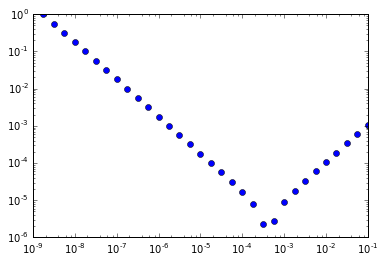

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(1)
plt.loglog(Ak,ek,'o')

In [ ]:
fId = open(prefix+'.gradient_accuracy.txt','w')
for k in range(32):
    fId.write(str(Ak[k])+"\t"+str(QoIk[k])+"\t"+str(Gradk[k])+"\t"+str(ek[k])+"\n")
fId.close()

In [3]:
baseline_control_forcing_file = ''
# grad_file = prefix+'.gradient_controlRegion.dat'
grad_file = prefix+'.control_forcing_controlRegion0.dat'
control_forcing_file = prefix+'.control_forcing_controlRegion.dat'
actuation_amount = 0.5
command = './zaxpy '+control_forcing_file+' '+str(actuation_amount)+' '+grad_file+' '+baseline_control_forcing_file
subprocess.check_call(command, shell=True)

0